In [ ]:
# convert video to images by framerate (-r)
# ffmpeg -i train.mp4 -r 20 images/output_%05d.png

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pathlib import Path

In [3]:
PATH = Path('../data/comma2k19/comma2k19')

In [5]:
# rename 's/^99c94dc769b5d96e\|//' *  # remove car tag| from in front of folder names
# b0c9d2329ad1606b -> tag for chunks 1&2 (rav4)

chunk = PATH/'Chunk_9'
!ls {chunk}

2018-10-14--14-06-44 2018-10-15--14-39-02 2018-10-28--10-45-34
2018-10-15--08-45-15 2018-10-16--10-13-38 2018-10-28--11-13-03
2018-10-15--13-41-14 2018-10-17--10-24-00 2018-10-30--13-54-09
2018-10-15--13-43-11 2018-10-25--13-21-14 2018-11-04--08-49-46


In [6]:
dirs = sorted(os.listdir(chunk))
dirs

['.DS_Store',
 '2018-10-14--14-06-44',
 '2018-10-15--08-45-15',
 '2018-10-15--13-41-14',
 '2018-10-15--13-43-11',
 '2018-10-15--14-39-02',
 '2018-10-16--10-13-38',
 '2018-10-17--10-24-00',
 '2018-10-25--13-21-14',
 '2018-10-28--10-45-34',
 '2018-10-28--11-13-03',
 '2018-10-30--13-54-09',
 '2018-11-04--08-49-46']

In [6]:
def go_home():
    %cd ~/Projects/DeepLearning/

In [6]:
go_home()

/Users/adamschiller/Projects/DeepLearning


In [16]:
!pwd

/Users/adamschiller/Projects/DeepLearning


In [23]:
def folders(path):
    return sorted([int(i) for i in os.listdir(path) if i.isdigit()])   # sort and return only numerical folders
#     return sorted(next(os.walk(path))[1])   # only look at directories

In [24]:
folders(chunk/dirs[7])

[33, 34, 35, 36, 37, 38, 39, 40, 41, 42]

In [8]:
def hevcs_to_mp4(path):
    try:
        %cd {path}
        if 'output.mp4' not in os.listdir('.'):
            #!for f in ./*/video.hevc; do echo "file '$f'" >> mylist.txt; done   # not sorted...
            !for f in `ls | sort -n`; do echo "file './$f/video.hevc'" >> mylist.txt; done  # sorted by number
            !ffmpeg -f concat -safe 0 -i mylist.txt -c copy output.hevc
            !ffmpeg -i output.hevc -r 20 -vf scale=640:480 output.mp4
            !rm output.hevc
            !rm mylist.txt
    finally:
        go_home()

In [12]:
def speeds(path):
    xs,ys = [],[]  
    for i in folders(path):
        # 20 Hz - rav4
        # 25 Hx - civic
        xs.append(np.load(path/str(i)/'global_pose/frame_times'))
        ys.append(np.linalg.norm(np.load(path/str(i)/'global_pose/frame_velocities'),axis=1))
        
        # ~83 Hx - rav4
        #xs.append(np.load(path/str(i)/'processed_log/CAN/speed/t'))
        #ys.append(np.load(path/str(i)/'processed_log/CAN/speed/value'))
    xs = np.concatenate(xs)
    ys = np.concatenate(ys)
    return xs, ys.flatten()

In [ ]:
i = 6
path = chunk/dirs[i]

hevcs_to_mp4(path)
!ls {path}

In [30]:
x,y = speeds(chunk/dirs[-2])

In [33]:
len(y)/25/60

10.4

In [39]:
np.savetxt('c10_speeds.txt', y, fmt='%.6f')

In [57]:
def convert_fps(x, diff=5):
    # orig - diff = out   # 25fps => 20fps : diff=5
    return np.delete(x, slice(None,None,diff))

In [58]:
x = convert_fps(x)
y = convert_fps(y)
len(y)

4800

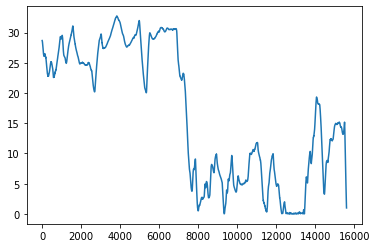

In [43]:
plt.plot(y)

In [7]:
## convert hevc to mp4 and then concatenate
# def save_mp4s(path):
#     for i,num in enumerate(folders(path)):
#         name = f'video_{i}.mp4'
#         !ffmpeg -i {str(path/str(num)/'video.hevc')} -r '20' {str(path/name)}

# def concat_mp4s(path):
#     %cd {path}
#     !for f in ./video_*.mp4; do echo "file '$f'" >> mylist.txt; done
#     !ffmpeg -f concat -safe 0 -i mylist.txt -c copy output.mp4
#     !rm video_*.mp4
#     !rm mylist.txt
#     go_home()

# bash script

In [ ]:
# #!/bin/bash

# cd $1

# if [[ -f output.mp4 ]]; then
#     echo "output.mp4 exists on your filesystem."
# else
#     for f in `ls | sort -n`; do echo "file './$f/video.hevc'" >> mylist.txt; done
#     ffmpeg -f concat -safe 0 -i mylist.txt -c copy output.hevc
#     ffmpeg -i output.hevc -crf 15 -vf scale=640:480 output.mp4
#     rm output.hevc
#     rm mylist.txt
#     echo "output.mp4 created."
# fi

# cd ..

In [ ]:
# chmod 0700 video_script.sh
# for f in *; do ../video_script.sh $f; done    # NOTE: video_script.sh is in the parent (chunk) directory